In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(style='white')
import numpy as np
import pandas as pd
import json
import tqdm
import re

# videos

In [2]:
metas_df = pd.read_csv('metas_since_2018.csv')
metas_df['video_publish_date'] = pd.to_datetime(metas_df.video_publish_date)
metas_df['like_ratio'] = metas_df.eval(' video_like_count / video_dislike_count ')
metas_df['link'] = 'https://www.youtube.com/watch?v=' + metas_df.video_id
print(metas_df.shape)
metas_df.head(5)

(337, 16)


,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,like_ratio,link
0,mdFDFiFNdUg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 05:48:21,"NBA Top 10 Plays of the Night | November 4, 2018",Check out the top 10 plays of the night around...,17,620581,411,6294,231,https://i.ytimg.com/vi/mdFDFiFNdUg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.305499,27.246753,https://www.youtube.com/watch?v=mdFDFiFNdUg
1,WkyjUET53Dw,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-04 05:42:23,"NBA Top 10 Plays of the Night | November 3, 2018",Check out the top 10 plays of the night around...,17,512738,309,6641,129,https://i.ytimg.com/vi/WkyjUET53Dw/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.508599,51.480620,https://www.youtube.com/watch?v=WkyjUET53Dw
2,r2pAPk78-zs,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-03 06:11:31,"NBA Top 10 Plays of the Night | November 2, 2018",Check out the top 10 plays of the night around...,17,513531,300,5672,407,https://i.ytimg.com/vi/r2pAPk78-zs/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.741083,13.936118,https://www.youtube.com/watch?v=r2pAPk78-zs
3,YK91As17ixg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-02 06:18:41,"NBA Top 10 Plays of the Night | November 1, 2018",Check out the top 10 plays of the night around...,17,583258,319,5419,909,https://i.ytimg.com/vi/YK91As17ixg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.919525,5.961496,https://www.youtube.com/watch?v=YK91As17ixg
4,FI1PXg7_Ex0,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-01 06:33:01,"NBA Top 10 Plays of the Night | October 31, 2018",Check out the top 10 plays of the night around...,17,537942,287,5943,162,https://i.ytimg.com/vi/FI1PXg7_Ex0/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.100262,36.685185,https://www.youtube.com/watch?v=FI1PXg7_Ex0


In [3]:
metas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 16 columns):
video_id               337 non-null object
channel_title          337 non-null object
channel_id             337 non-null object
video_publish_date     337 non-null datetime64[ns]
video_title            337 non-null object
video_description      337 non-null object
video_category         337 non-null int64
video_view_count       337 non-null int64
video_comment_count    337 non-null int64
video_like_count       337 non-null int64
video_dislike_count    337 non-null int64
video_thumbnail        337 non-null object
video_tags             337 non-null object
collection_date        337 non-null object
like_ratio             337 non-null float64
link                   337 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(9)
memory usage: 42.2+ KB


In [4]:
metas_df.columns

Index(['video_id', 'channel_title', 'channel_id', 'video_publish_date',
       'video_title', 'video_description', 'video_category',
       'video_view_count', 'video_comment_count', 'video_like_count',
       'video_dislike_count', 'video_thumbnail', 'video_tags',
       'collection_date', 'like_ratio', 'link'],
      dtype='object')

In [5]:
counts_cols = ['video_view_count', 'video_comment_count', 
          'video_like_count', 'video_dislike_count']

/home/noone/.virtualenvs/env36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


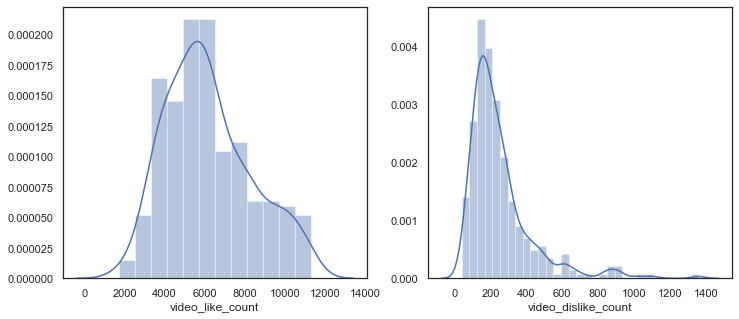

In [6]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(metas_df.video_like_count, ax=ax[0])
sns.distplot(metas_df.video_dislike_count, ax=ax[1])

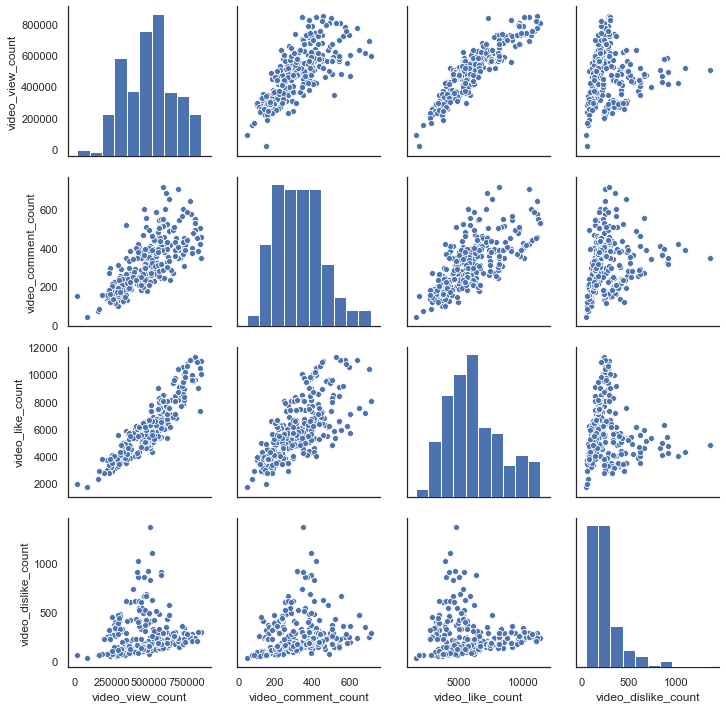

In [7]:
sns.pairplot(metas_df[counts_cols])

In [8]:
metas_df[counts_cols + ['like_ratio']].describe().T

,count,mean,std,min,25%,50%,75%,max
video_view_count,337.0,502432.385757,167498.732329,18216.000000,365480.000000,510010.000000,604294.00000,850799.000000
video_comment_count,337.0,326.228487,128.515626,45.000000,232.000000,317.000000,401.00000,715.000000
video_like_count,337.0,6188.839763,2130.140025,1726.000000,4602.000000,5870.000000,7531.00000,11287.000000
video_dislike_count,337.0,251.593472,180.980936,39.000000,142.000000,200.000000,293.00000,1360.000000
like_ratio,337.0,33.254826,15.959521,3.536765,20.349432,36.266304,44.25641,79.269231


In [9]:
metas_df.video_publish_date.describe()

count                     337
unique                    296
top       2019-12-10 07:34:46
freq                        3
first     2018-10-17 06:45:32
last      2019-12-29 09:04:59
Name: video_publish_date, dtype: object

# comments

In [10]:
df_comments = pd.read_pickle('comments.pickle.zip', compression='zip')
print(df_comments.shape)
df_comments.head()

(78130, 12)


,video_id,commenter_channel_url,commenter_channel_id,commenter_channel_display_name,comment_id,comment_like_count,comment_publish_date,text,commenter_rating,comment_parent_id,collection_date,reply_count
0,mdFDFiFNdUg,http://www.youtube.com/channel/UChYlIA8HRJWF6I...,UChYlIA8HRJWF6IA0vOeXFdA,אריאל שטיקגולד,UgyLUAugb3JqhwWm28J4AaABAg,0,2019-04-26 07:58:00,עומריי,none,None,2019-12-30 23:48:56.122289,0
1,mdFDFiFNdUg,http://www.youtube.com/channel/UCEbWyyc0SBNVBN...,UCEbWyyc0SBNVBN2JQrek6ZA,Sports Reel,UgwIAB3KF_SgWshQkHh4AaABAg,0,2019-04-14 18:16:16,kelly oubre 0:05 josh jackson 0:19 pascal siak...,none,None,2019-12-30 23:48:56.122450,0
2,mdFDFiFNdUg,http://www.youtube.com/channel/UCq-ADgtmEduuIh...,UCq-ADgtmEduuIhfROjQBRFA,seven FangYuan,Ugza_XUyq19KjzULyVN4AaABAg,0,2018-11-10 00:43:32,💤看美女💤大尺度私🈲️视频➕微信girL6393💤过的泰国的人等待uguuu,none,None,2019-12-30 23:48:56.122549,0
3,mdFDFiFNdUg,http://www.youtube.com/channel/UC_kwzeXK_7ikgi...,UC_kwzeXK_7ikgiDdOzdQBZQ,Darth Sire,UgyXZLNHqLLIdEngTwt4AaABAg,0,2018-11-08 17:07:05,Why is the Giannis dunk at 2 and not at 1?,none,None,2019-12-30 23:48:56.122633,0
4,mdFDFiFNdUg,http://www.youtube.com/channel/UC-QSwoxh-5anPZ...,UC-QSwoxh-5anPZdCYnHXTOw,danknasty661,Ugx9XVyixTQPQR0YLz14AaABAg,0,2018-11-07 02:09:08,"Devin booker is a natural kobe, Tatum is a fak...",none,None,2019-12-30 23:48:56.122712,0


In [11]:
cmnts = [c.lower() for c in df_comments.text.sample(1000, random_state=42)]
print(len(cmnts))
cmnts[:5]

1000


['goatmentator has now clearance to play \nload management no more.',
 "i clicked the replay button not to watch the plays again but to hear the effin' bars!",
 'air gordon',
 '"but just give malik a peak & his a game winning freak.. monk". bars!!!',
 'a big dunk at 2:31.\n11-27-19.']

In [12]:
def f(s, pat):
    pat = r'(\w*%s\w*)' % pat       # Not thrilled about this line
    return re.findall(pat, s)


sum([f(c, "mentator") for c in cmnts], [])

['goatmentator',
 'chillmentator',
 'goatmentator',
 'okmentator',
 'cringementator',
 'commentator',
 'goatmentator',
 'goatmentator',
 'cringementator',
 'goatmentator',
 'commentator',
 'goatmentator',
 'commentator',
 'goatmentator',
 'cringementator',
 'commentator',
 'goatmentator',
 'spoilermentator',
 'goatmentator',
 'commentator',
 'orgasmentator',
 'depressmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'piratementator',
 'commentator',
 'goatmentator',
 'goatmentator',
 'onemoretimecommentator',
 'commentator',
 'goatmentator',
 'commentator',
 'responsiblementator',
 'ofthedaymentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'commentators',
 'goatmentator',
 'chillmentator',
 'commentator',
 'cringementator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'goatmentator',
 'cringmentator',
 'goatmentator',
 'newmentator',
 'goatmentator',
 '

In [13]:
df_comments['ment_words'] = df_comments.text.map(lambda t: f(t.lower(), "mentator"))

In [14]:
for w in ['goat', 'cring']:
    df_comments[f'{w}_cnt'] = df_comments.ment_words.map(lambda l: sum([1 for x in l if w in x]))

In [15]:
df_comments.head()

,video_id,commenter_channel_url,commenter_channel_id,commenter_channel_display_name,comment_id,comment_like_count,comment_publish_date,text,commenter_rating,comment_parent_id,collection_date,reply_count,ment_words,goat_cnt,cring_cnt
0,mdFDFiFNdUg,http://www.youtube.com/channel/UChYlIA8HRJWF6I...,UChYlIA8HRJWF6IA0vOeXFdA,אריאל שטיקגולד,UgyLUAugb3JqhwWm28J4AaABAg,0,2019-04-26 07:58:00,עומריי,none,None,2019-12-30 23:48:56.122289,0,[],0,0
1,mdFDFiFNdUg,http://www.youtube.com/channel/UCEbWyyc0SBNVBN...,UCEbWyyc0SBNVBN2JQrek6ZA,Sports Reel,UgwIAB3KF_SgWshQkHh4AaABAg,0,2019-04-14 18:16:16,kelly oubre 0:05 josh jackson 0:19 pascal siak...,none,None,2019-12-30 23:48:56.122450,0,[],0,0
2,mdFDFiFNdUg,http://www.youtube.com/channel/UCq-ADgtmEduuIh...,UCq-ADgtmEduuIhfROjQBRFA,seven FangYuan,Ugza_XUyq19KjzULyVN4AaABAg,0,2018-11-10 00:43:32,💤看美女💤大尺度私🈲️视频➕微信girL6393💤过的泰国的人等待uguuu,none,None,2019-12-30 23:48:56.122549,0,[],0,0
3,mdFDFiFNdUg,http://www.youtube.com/channel/UC_kwzeXK_7ikgi...,UC_kwzeXK_7ikgiDdOzdQBZQ,Darth Sire,UgyXZLNHqLLIdEngTwt4AaABAg,0,2018-11-08 17:07:05,Why is the Giannis dunk at 2 and not at 1?,none,None,2019-12-30 23:48:56.122633,0,[],0,0
4,mdFDFiFNdUg,http://www.youtube.com/channel/UC-QSwoxh-5anPZ...,UC-QSwoxh-5anPZdCYnHXTOw,danknasty661,Ugx9XVyixTQPQR0YLz14AaABAg,0,2018-11-07 02:09:08,"Devin booker is a natural kobe, Tatum is a fak...",none,None,2019-12-30 23:48:56.122712,0,[],0,0


# word cloud

In [16]:
#!pip install wordcloud

In [17]:
all_mentators = sum(df_comments.ment_words, [])
print(len(all_mentators))
print(all_mentators[:10])

14102
['mentator', 'sexymentator', 'commentator', 'goatmentator', 'pussymentator', 'womentator', 'mentator', 'mentator', 'goatmentator', 'commentators']


(650, 650, 4)


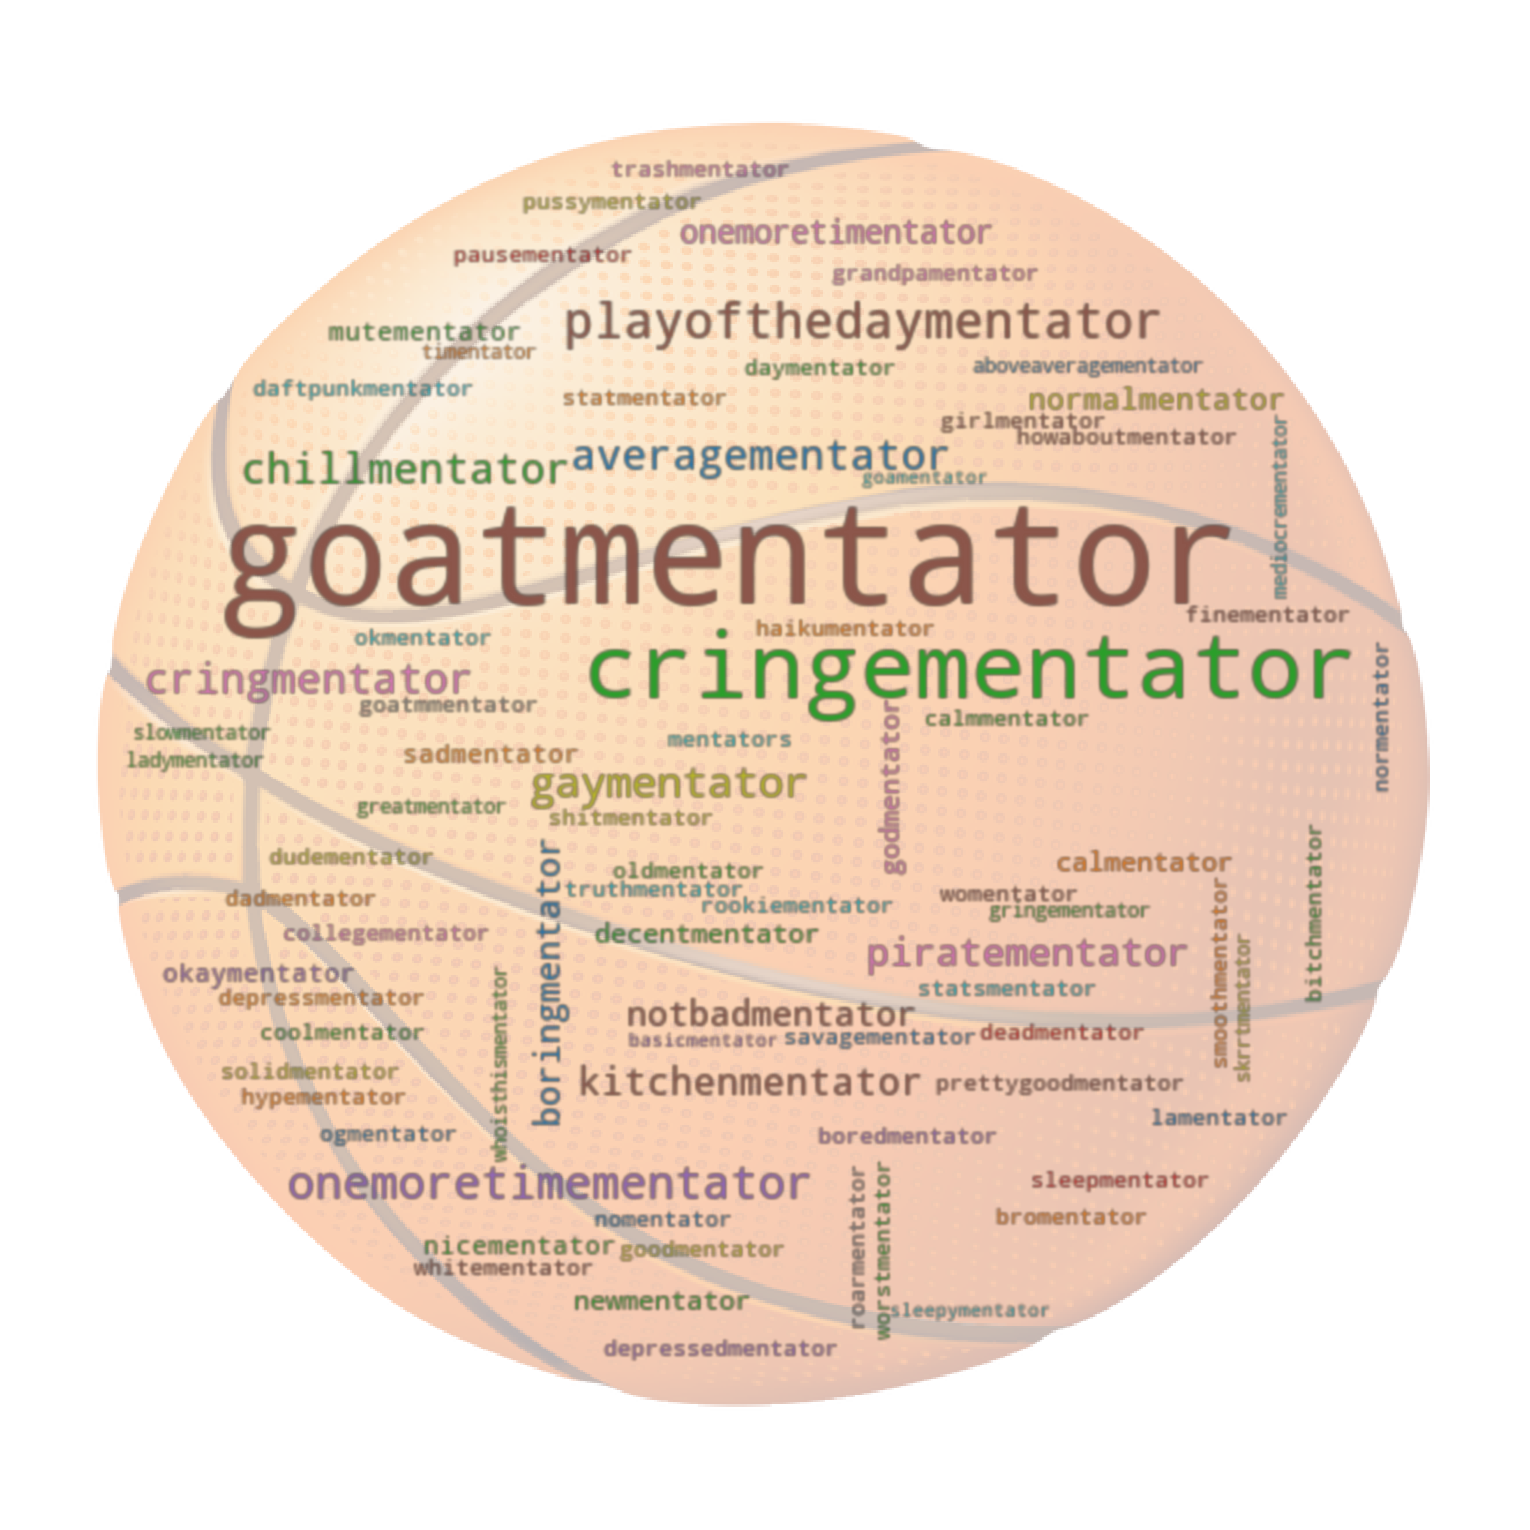

In [18]:
from wordcloud import WordCloud, random_color_func
from PIL import Image

def color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    if random_state is None:
        random_state = Random()
    return "hsl(%d, 80%%, 50%%)" % random_state.randint(0, 255)

ball_mask = np.array(Image.open("ball_mask.png"))
wc = WordCloud(#width=1200, height=1280,
               #color_func=color_func, 
               colormap='tab10',
               prefer_horizontal=0.9, 
               background_color=None, #"rgba(255, 255, 255, 0)",
               mode="RGBA", #background_color='white', 
               max_words=100, 
               min_font_size=8,
               stopwords=set(['commentator', 'commentators', 'mentator', 'comentator', 'comentators']),
        
               collocations=False, random_state=42, mask=ball_mask)
wordcloud = wc.generate(" ".join(all_mentators))

f = plt.figure(figsize=(10,10), dpi=150)
plt.imshow(plt.imread('./pngguru.com.png'), alpha=0.3)
arr = wordcloud.to_array()
print(arr.shape)
#wordcloud.to_file('_wc.png')
plt.imshow(wordcloud, interpolation='bicubic')#, alpha=0.9)
#plt.imshow(plt.imread('./pngguru.com.png'), alpha=0.5)
plt.axis("off")
plt.tight_layout(pad=0)
f.savefig('wc.png')

# goat vs cringe

In [19]:
by_video = df_comments.groupby('video_id')['goat_cnt', 'cring_cnt'].sum().reset_index()
print(by_video.goat_cnt.value_counts().to_frame().T)
print(by_video.cring_cnt.value_counts().to_frame().T)
by_video.head()

          3    7    4    8    6    5    14   2    12   10   ...  47   46   \
goat_cnt   23   18   16   15   13   12   12   11   11   10  ...    1    1   

          44   41   40   39   25   37   35   166  
goat_cnt    1    1    1    1    1    1    1    1  

[1 rows x 66 columns]
           1   0   2   3   4   6   5   10  8   7   ...  60  20  21  22  26  \
cring_cnt  51  47  43  31  21  11  10   7   7   6  ...   1   1   1   1   1   

           32  33  34  46  78  
cring_cnt   1   1   1   1   1  

[1 rows x 35 columns]


,video_id,goat_cnt,cring_cnt
0,-kDTlCv11h8,26,3
1,-xR0-jmJPzk,28,4
2,0BR2QBSKwaY,8,0
3,0Gt0uWMlRzo,1,1
4,0HMue2wQMLk,0,0


/home/noone/.virtualenvs/env36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


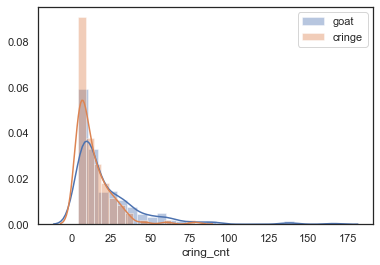

In [20]:
ax = sns.distplot(by_video.query('goat_cnt > 3').goat_cnt, label='goat')
ax = sns.distplot(by_video.query('cring_cnt > 3').cring_cnt, label='cringe', ax=ax)
ax.legend();

In [21]:
by_video['voice'] = 'Прочие'
by_video.loc[by_video.cring_cnt > 15, 'voice'] = 'Cringe'
by_video.loc[by_video.goat_cnt > 15, 'voice'] = 'GOAT'
by_video.voice.value_counts().to_frame().T

,Прочие,GOAT,Cringe
voice,141,116,38


In [22]:
df = pd.merge(metas_df, by_video, on='video_id')
print(df.shape)
df.head()

(336, 19)


,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,like_ratio,link,goat_cnt,cring_cnt,voice
0,mdFDFiFNdUg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-05 05:48:21,"NBA Top 10 Plays of the Night | November 4, 2018",Check out the top 10 plays of the night around...,17,620581,411,6294,231,https://i.ytimg.com/vi/mdFDFiFNdUg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.305499,27.246753,https://www.youtube.com/watch?v=mdFDFiFNdUg,8,3,Прочие
1,WkyjUET53Dw,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-04 05:42:23,"NBA Top 10 Plays of the Night | November 3, 2018",Check out the top 10 plays of the night around...,17,512738,309,6641,129,https://i.ytimg.com/vi/WkyjUET53Dw/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.508599,51.480620,https://www.youtube.com/watch?v=WkyjUET53Dw,33,3,GOAT
2,r2pAPk78-zs,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-03 06:11:31,"NBA Top 10 Plays of the Night | November 2, 2018",Check out the top 10 plays of the night around...,17,513531,300,5672,407,https://i.ytimg.com/vi/r2pAPk78-zs/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.741083,13.936118,https://www.youtube.com/watch?v=r2pAPk78-zs,4,29,Cringe
3,YK91As17ixg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-02 06:18:41,"NBA Top 10 Plays of the Night | November 1, 2018",Check out the top 10 plays of the night around...,17,583258,319,5419,909,https://i.ytimg.com/vi/YK91As17ixg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:57.919525,5.961496,https://www.youtube.com/watch?v=YK91As17ixg,9,19,Cringe
4,FI1PXg7_Ex0,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-11-01 06:33:01,"NBA Top 10 Plays of the Night | October 31, 2018",Check out the top 10 plays of the night around...,17,537942,287,5943,162,https://i.ytimg.com/vi/FI1PXg7_Ex0/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:26:58.100262,36.685185,https://www.youtube.com/watch?v=FI1PXg7_Ex0,10,2,Прочие


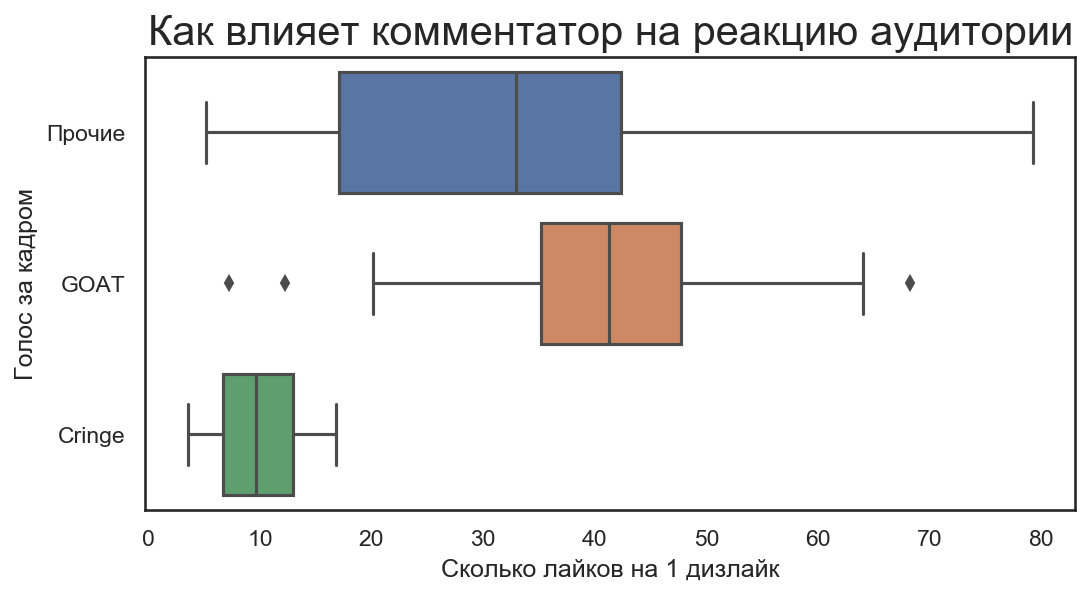

In [23]:
f, ax = plt.subplots(1,1, figsize=(8, 4), dpi=150)
sns.boxplot(x=df.like_ratio, y=df.voice, ax=ax)
ax.set_ylabel('Голос за кадром')
ax.set_xlabel('Сколько лайков на 1 дизлайк')
ax.set_title('Как влияет комментатор на реакцию аудитории', {'fontsize': 20});
f.savefig('voice.png')

/home/noone/.virtualenvs/env36/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


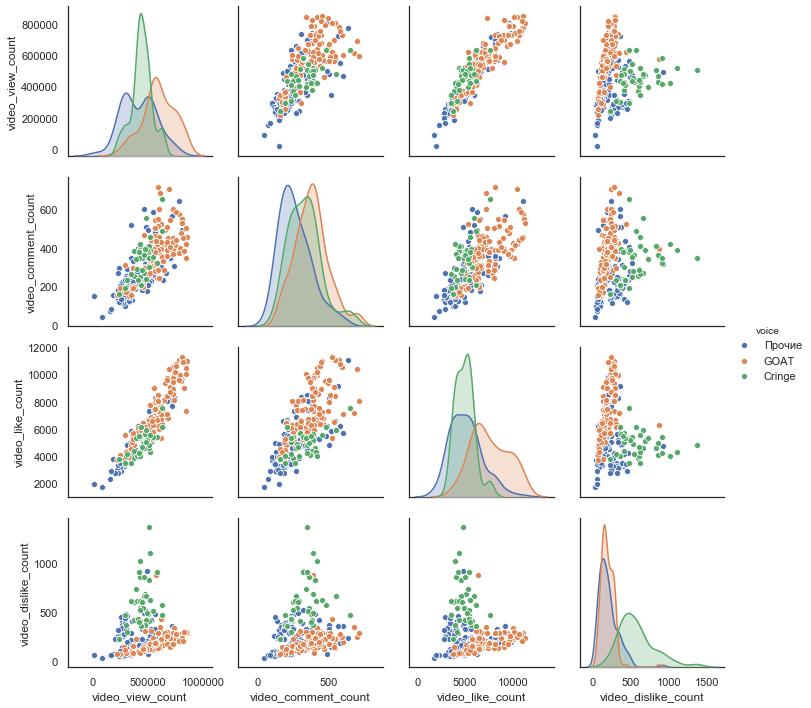

In [24]:
sns.pairplot(df[counts_cols + ['voice']], hue='voice')

# best

In [25]:
pd.concat((df.sort_values('like_ratio').head(1),
           df.sort_values('like_ratio').tail(1)))

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,like_ratio,link,goat_cnt,cring_cnt,voice
27,O4mP2pYIbME,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-12-05 05:46:17,"NBA Top 10 Plays of the Night | December 4, 2018",Check out the top 10 plays of the night around...,17,507909,347,4810,1360,https://i.ytimg.com/vi/O4mP2pYIbME/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:27:02.760188,3.536765,https://www.youtube.com/watch?v=O4mP2pYIbME,5,28,Cringe
138,5SWOCx8ebg8,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2019-03-11 04:36:57,"NBA Top 10 Plays of the Night | March 10, 2019",Check out the top 10 plays of the night from a...,17,498732,489,6183,78,https://i.ytimg.com/vi/5SWOCx8ebg8/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:27:24.759065,79.269231,https://www.youtube.com/watch?v=5SWOCx8ebg8,5,3,Прочие


In [26]:
pd.concat((df.sort_values('video_dislike_count').tail(1),
           df.sort_values('video_like_count').tail(1)))

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,like_ratio,link,goat_cnt,cring_cnt,voice
27,O4mP2pYIbME,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2018-12-05 05:46:17,"NBA Top 10 Plays of the Night | December 4, 2018",Check out the top 10 plays of the night around...,17,507909,347,4810,1360,https://i.ytimg.com/vi/O4mP2pYIbME/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:27:02.760188,3.536765,https://www.youtube.com/watch?v=O4mP2pYIbME,5,28,Cringe
269,1tYXbB_8pjg,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2019-11-16 07:54:33,"NBA Top 10 Plays of the Night | November 15, 2019",Check out the top 10 plays of the night from a...,17,804989,528,11287,240,https://i.ytimg.com/vi/1tYXbB_8pjg/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:27:50.260016,47.029167,https://www.youtube.com/watch?v=1tYXbB_8pjg,92,6,GOAT


In [27]:
pd.concat((df.sort_values('video_view_count').head(1),
           df.sort_values('video_view_count').tail(1)))

,video_id,channel_title,channel_id,video_publish_date,video_title,video_description,video_category,video_view_count,video_comment_count,video_like_count,video_dislike_count,video_thumbnail,video_tags,collection_date,like_ratio,link,goat_cnt,cring_cnt,voice
335,9XS0FZah4ic,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2019-12-29 09:04:59,"NBA Top 10 Plays of the Night | December 28, 2019",Check out the top 10 plays of the night from a...,17,18216,149,1970,60,https://i.ytimg.com/vi/9XS0FZah4ic/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:28:03.936914,32.833333,https://www.youtube.com/watch?v=9XS0FZah4ic,6,10,Прочие
245,M2HGCDCLRRs,NBA,UCWJ2lWNubArHWmf3FIHbfcQ,2019-11-02 06:47:03,"NBA Top 10 Plays of the Night | November 1, 2019",Check out the top 10 plays of the night from a...,17,850799,456,11005,287,https://i.ytimg.com/vi/M2HGCDCLRRs/hqdefault.jpg,nba|highlights|basketball|plays|amazing|sports...,2019-12-29 16:27:45.799880,38.344948,https://www.youtube.com/watch?v=M2HGCDCLRRs,18,2,GOAT
